<div style="text-align: center;">
    <h1>Seminario Final de Estadística</h1>
</div>


## Integrantes

- Jabel Resendiz Aguirre              - C312
- Arianne Camila Palancar Ochando     - C311
- Noel Pérez Calvo                    - C311

## Introducción

Las enfermedades cardiovasculares representan una de las principales causas de mortalidad a nivel mundial, afectando de manera significativa a la población de la tercera edad. En particular, los ataques cardíacos son eventos críticos que pueden tener consecuencias devastadoras para la salud y la calidad de vida de los individuos mayores. Este estudio se centra en la recopilación y análisis de datos de personas de la tercera edad que han sufrido ataques cardíacos, con el objetivo de realizar un análisis estadístico inferencial y desarrollar modelos predictivos que puedan ayudar a identificar factores de riesgo y mejorar las estrategias de prevención y tratamiento.

### Objetivos : 
1. `Comprender el Dataset`: Analizaremos las variables incluidas en el conjunto de datos, como la edad, el sexo, la presión arterial, y otros factores de riesgo

2. `Estadística inferencial`: Aplicaremos métodos de estadística inferencial para hacer generalizaciones sobre la población a partir de nuestra muestra de datos. Esto incluirá la estimación de parámetros y la realización de pruebas de hipótesis para evaluar la significancia de nuestras observaciones.

Se consideró en el estudio una muestra de pacientes de la tercera edad. Las columnas de datos a analizar son:

- `Edad`: Edad del paciente en años
- `Sexo`: Sexo del paciente (Hombre=1 , mujer=0)
- `Presión Arterial`
- `Colesterol`
- `Frecuencia cardiaca`
- `Diabetes`: Si el paciente sufre de diabetes (1=SI 0=NO)
- `Fumador`: Si el paciente es fumador (1=SI 0=NO)
- `IMC`: Índice de masa corporal
- `Actividad física semanal`
- `meses desde el último chequeo`

Este seminario no solo nos ayudará a entender mejor los factores que contribuyen a los ataques cardíacos, sino que también nos proporcionará habilidades prácticas en el uso de herramientas estadísticas.



## Importando módulos

In [19]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import norm 
import matplotlib.pyplot as plt

## Cargando datos

In [6]:
heart = pd.read_csv("heart_attack_dataset.csv")

## Análisis exploratorio de los datos

### Descripción básica de los datos

In [7]:
heart.head() # verficar que se han cargado correctamente los datos

,Edad,Sexo,Presion_Arterial,Colesterol,Frecuencia_Cardiaca,Diabetes,Fumador,IMC,Actividad_Fisica_Semanal,Meses_Desde_Ultimo_Chequeo
0,64,1,96,179,86,1,1,26.46,3,3
1,58,1,140,256,86,0,1,29.24,1,5
2,66,0,116,291,81,0,0,19.15,0,6
3,75,0,141,185,63,0,1,21.37,3,13
4,57,0,114,182,91,1,0,21.03,3,0


In [8]:
heart.info() #Se proporciona información útil sobre el DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Edad                        300 non-null    int64  
 1   Sexo                        300 non-null    int64  
 2   Presion_Arterial            300 non-null    int64  
 3   Colesterol                  300 non-null    int64  
 4   Frecuencia_Cardiaca         300 non-null    int64  
 5   Diabetes                    300 non-null    int64  
 6   Fumador                     300 non-null    int64  
 7   IMC                         300 non-null    float64
 8   Actividad_Fisica_Semanal    300 non-null    int64  
 9   Meses_Desde_Ultimo_Chequeo  300 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 23.6 KB


In [9]:
heart.describe() #generar estadísticas descriptiva del DataFrame

,Edad,Sexo,Presion_Arterial,Colesterol,Frecuencia_Cardiaca,Diabetes,Fumador,IMC,Actividad_Fisica_Semanal,Meses_Desde_Ultimo_Chequeo
count,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,59.413333,0.603333,129.093333,205.62000,74.960000,0.200000,0.276667,26.910300,2.976667,10.926667
std,9.872218,0.490023,19.765971,39.23127,10.111671,0.400668,0.448098,5.028559,1.698747,11.515351
min,27.000000,0.000000,76.000000,84.00000,49.000000,0.000000,0.000000,11.900000,0.000000,0.000000
25%,53.000000,0.000000,116.750000,179.00000,68.000000,0.000000,0.000000,23.790000,2.000000,3.000000
50%,60.000000,1.000000,130.000000,207.00000,75.000000,0.000000,0.000000,26.975000,3.000000,8.000000
75%,66.000000,1.000000,142.000000,230.00000,81.250000,0.000000,1.000000,30.110000,4.000000,14.000000
max,98.000000,1.000000,182.000000,301.00000,100.000000,1.000000,1.000000,42.690000,9.000000,73.000000


### SEXO

Utilizaremos **Matplotlib** para representar visualmente la distribución de sexo en el conjunto de datos.

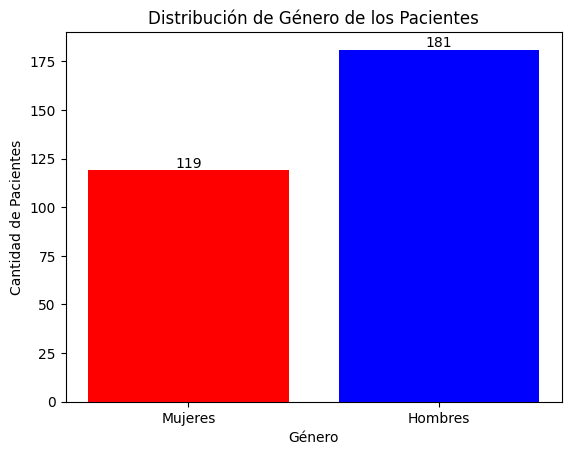

In [12]:
#Contar la cantidad de mujeres (0) y hombres (1)
gender_counts = heart["Sexo"].value_counts()
gender_counts

# Crear un gráfico de barras
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'red'])
plt.xticks([0, 1], ['Mujeres', 'Hombres'])
plt.title('Distribución de Género de los Pacientes')
plt.xlabel('Género')
plt.ylabel('Cantidad de Pacientes')

for index,value in enumerate(gender_counts.values):
        plt.text((index+1)%2,value,str(value),ha='center', va='bottom')
plt.show()


En nuestro análisis de datos, encontramos que la distribución de género de los pacientes es la siguiente: 181 pacientes hombres y 119 pacientes mujeres. Computemos la estimación puntual de la proporción de todas las mujeres del estudio que han sufrido de ataques cardiacos. Tenemos en cuneta 

In [16]:
mean_estimator = gender_counts[0]/ gender_counts.sum()
mean_estimator

0.39666666666666667

In [17]:
variance_estimator = mean_estimator*(1-mean_estimator)/gender_counts.sum()
variance_estimator

0.0007977407407407407

Construyamos un intervalo de confianza del 95 % para la proporción antes calculada.

Recordemos que el intervalo de confianza para una proporción se calcula
$$P(A) \in [ \hat{p} - \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}Z_{1 - \frac{\alpha}{2}} ; \hat{p} + \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}Z_{1 - \frac{\alpha}{2}}]$$

In [26]:
alpha = 0.05
n = gender_counts.sum()
Z = norm.ppf( 1-alpha/2 )
sq = np.sqrt(variance_estimator)
lower_bound = mean_estimator - sq*Z
upper_bound = mean_estimator + sq*Z

print("Intervalo : [ ",lower_bound,"," , upper_bound, "]")


Intervalo : [  0.34130884693769264 , 0.4520244863956407 ]


Datos del National Center for Health Statistics (2015-2018) muestran que el 40% de las personas que han sido diagnosticado en Estados Unidos con ECV , son mujeres.

Analicemos si nuestra proporición es menor que esta propuesta por el centor.

In [30]:
alpha = 0.05
p0= 0.40
n = gender_counts.sum()
Z = norm.ppf( 1-alpha/2 )
Z_hat = (mean_estimator - p0)*np.sqrt(n/(p0*(1-p0)))


print(f"Valor Z_hat: {Z_hat}")

if Z_hat < Z:
    print("Rechazamos la hipótesis nula. La proporción muestral es significativamente menor que la proporción poblacional.")

else:
     print("No rechazamos la hipótesis nula. No hay evidencia suficiente para afirmar que la proporción muestral es menor que la proporción poblacional.")

Valor Z_hat: -0.11785113019775868
Rechazamos la hipótesis nula. La proporción muestral es significativamente menor que la proporción poblacional.
